# Машинное обучение, ФКН ВШЭ

# Практическое задание 7. Бустинговое

## Общая информация

Дата выдачи: 06.12.2021

Мягкий дедлайн: 18.12.2021 23:59 MSK

Жёсткий дедлайн: 19.12.2021 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [ ]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [ ]:
!wget 'https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-07-boosting/x.npz?raw=true'
!wget 'https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-07-boosting/y.npy?raw=true'

--2021-12-18 18:31:45--  https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-07-boosting/x.npz?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/esokolov/ml-course-hse/raw/master/2021-fall/homeworks-practice/homework-practice-07-boosting/x.npz [following]
--2021-12-18 18:31:45--  https://github.com/esokolov/ml-course-hse/raw/master/2021-fall/homeworks-practice/homework-practice-07-boosting/x.npz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2021-fall/homeworks-practice/homework-practice-07-boosting/x.npz [following]
--2021-12-18 18:31:45--  https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2021-fall/homeworks-practice/homework-practice-07-boo

In [ ]:
x = load_npz('x.npz?raw=true')
y = np.load('y.npy?raw=true')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [ ]:
% load_ext autoreload

In [ ]:
% autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [ ]:
boosting = Boosting()

% time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 1.97 s, sys: 332 µs, total: 1.97 s
Wall time: 1.97 s
Train ROC-AUC 0.9893
Valid ROC-AUC 0.9019
Test ROC-AUC 0.9189


## Задание 2. Обучение градиентного бустинга (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

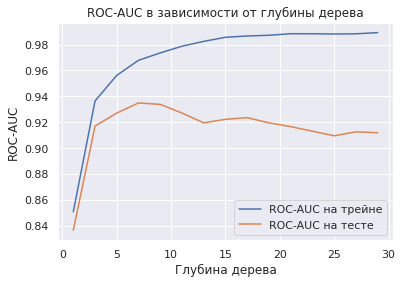

In [ ]:
roc_auc = {'train': [], 'test': []}
depths = range(1, 30, 2)

for depth in depths:
    boosting = Boosting(base_model_params={'max_depth': depth})
    boosting.fit(x_train, y_train, x_valid, y_valid)

    roc_auc['train'].append(boosting.score(x_train, y_train))
    roc_auc['test'].append(boosting.score(x_test, y_test))

plt.plot(depths, roc_auc['train'], label='ROC-AUC на трейне')
plt.plot(depths, roc_auc['test'], label='ROC-AUC на тесте')

plt.title('ROC-AUC в зависимости от глубины дерева')
plt.xlabel('Глубина дерева')
plt.ylabel('ROC-AUC')

plt.legend()
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

С глубиной дерева где-то 7. Сначала качество на тесте растет, потом, т.к. глубина дерева увеличивается => способность подстроиться под обучающую выборку увеличивается, качество на тесте начинает падать (мы знаем, что у глубоких деревьев --- высокая дисперсия, т.е. зависимость от обучающей выборки, а мы обучаемся на бутстрапированных выборках, => хуже качество на тесте и поэтому его шатает на глубоких деревьях). Т.е. глубина 7 достаточная, чтобы выяснить закономерность, но недостаточная, чтобы сильно подстроиться под обучающую выборку.

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (2 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей.

In [ ]:
from boosting import score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# базовые модели
params = {'max_depth': list(range(1, 20, 2)),
         'min_samples_leaf': [1, 5, 7, 10, 15]}

gs = GridSearchCV(DecisionTreeRegressor(), param_grid=params, cv=3)
gs.fit(x_valid, y_valid)
best_base = gs.best_params_
print(best_base)

{'max_depth': 5, 'min_samples_leaf': 15}


In [ ]:
# бустинг
params = {'n_estimators': list(range(2, 20, 2)),
         'early_stopping_rounds': [4, 5, 6], 
         'learning_rate': [0.05, 0.1, 0.15, 0.3]}

gs = GridSearchCV(Boosting(base_model_params = best_base), param_grid=params, cv=3, scoring=score)
gs.fit(x_valid, y_valid)
best_boosting = gs.best_params_
print(best_boosting)

{'early_stopping_rounds': 4, 'learning_rate': 0.3, 'n_estimators': 14}


In [ ]:
# результат моей модели

my_best_model = Boosting(base_model_params = best_base, **best_boosting)
my_best_model.fit(x_train, y_train, x_valid, y_valid)
my_best_model_score_test = my_best_model.score(x_test, y_test)
my_best_model_score_train = my_best_model.score(x_train, y_train)

print('Моя модель на трейне:', my_best_model_score_train, '\nМоя модель на тесте:', my_best_model_score_test)

Моя модель на трейне: 0.9583431461452137 
Моя модель на тесте: 0.9310751618190493


## Задание 4. Пробуем разные библиотеки (2 балла)

Выберите себе библиотеку с реализацией градиентного бустинга по вкусу из следующих трёх - [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_intro.html), [LightGBM](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html), [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart). Подберите основные гиперпараметры, постарайтесь добиться наилучшего качества на тестовых данных. Сравните результаты своей реализации с результатами библиотечного бустинга.

In [ ]:
pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import roc_auc_score

In [ ]:
# подсчет roc-auc для catboost

def score_cat(cat, x, y):
  return roc_auc_score(y == 1, cat.predict(x, prediction_type='Probability')[:, 1])

In [ ]:
params = {'n_estimators': [100, 400, 800, 1000],
         'max_depth': list(range(2, 10, 2)), 
         'learning_rate': [0.1, 0.05, 0.15],
         'loss_function': ['RMSE', 'Logloss', 'MAE', 'CrossEntropy']}
        
gs = GridSearchCV(CatBoostRegressor(), param_grid=params, cv=3, scoring=score_cat)
gs.fit(x_valid, y_valid)
best_catboost = gs.best_params_
print(best_catboost)

Выходные данные были обрезаны до нескольких последних строк (5000).
1:	learn: 0.5977527	total: 6.65ms	remaining: 2.65s
2:	learn: 0.5567312	total: 9.84ms	remaining: 2.62s
3:	learn: 0.5222880	total: 13ms	remaining: 2.59s
4:	learn: 0.4937660	total: 16.3ms	remaining: 2.59s
5:	learn: 0.4693852	total: 19.5ms	remaining: 2.58s
6:	learn: 0.4475095	total: 22.8ms	remaining: 2.59s
7:	learn: 0.4282888	total: 26.2ms	remaining: 2.59s
8:	learn: 0.4111397	total: 29.6ms	remaining: 2.6s
9:	learn: 0.3981350	total: 31.1ms	remaining: 2.46s
10:	learn: 0.3853666	total: 34.5ms	remaining: 2.48s
11:	learn: 0.3746632	total: 38ms	remaining: 2.49s
12:	learn: 0.3640295	total: 42.8ms	remaining: 2.59s
13:	learn: 0.3562069	total: 47.9ms	remaining: 2.69s
14:	learn: 0.3495673	total: 51.4ms	remaining: 2.69s
15:	learn: 0.3451977	total: 53.8ms	remaining: 2.63s
16:	learn: 0.3385868	total: 57.2ms	remaining: 2.63s
17:	learn: 0.3347906	total: 58.5ms	remaining: 2.54s
18:	learn: 0.3306707	total: 61.9ms	remaining: 2.54s
19:	learn:

In [ ]:
# результат на тесте catboost с лучшими параметрами

best_catboost_model = CatBoostRegressor(**best_catboost)
best_catboost_model.fit(x_train, y_train)
best_catboost_score_test = score_cat(best_catboost_model, x_test, y_test)
best_catboost_score_train = score_cat(best_catboost_model, x_train, y_train)

0:	learn: 0.9095792	total: 2.14ms	remaining: 854ms
1:	learn: 0.8714994	total: 4.13ms	remaining: 823ms
2:	learn: 0.8395088	total: 6.19ms	remaining: 820ms
3:	learn: 0.8116251	total: 8.42ms	remaining: 834ms
4:	learn: 0.7887072	total: 10.6ms	remaining: 841ms
5:	learn: 0.7668424	total: 12.9ms	remaining: 846ms
6:	learn: 0.7494355	total: 15.2ms	remaining: 854ms
7:	learn: 0.7337507	total: 17.4ms	remaining: 853ms
8:	learn: 0.7189771	total: 19.6ms	remaining: 851ms
9:	learn: 0.7064898	total: 21.8ms	remaining: 850ms
10:	learn: 0.6965862	total: 24ms	remaining: 849ms
11:	learn: 0.6860590	total: 26.2ms	remaining: 848ms
12:	learn: 0.6772920	total: 28.4ms	remaining: 847ms
13:	learn: 0.6699404	total: 30.7ms	remaining: 846ms
14:	learn: 0.6634966	total: 32.9ms	remaining: 844ms
15:	learn: 0.6573992	total: 35.1ms	remaining: 843ms
16:	learn: 0.6524445	total: 37.7ms	remaining: 849ms
17:	learn: 0.6477590	total: 39.8ms	remaining: 845ms
18:	learn: 0.6438853	total: 42.3ms	remaining: 849ms
19:	learn: 0.6396616	tot

In [ ]:
print("CatBoost с моими параметрами на трейне:", best_catboost_score_train)
print("CatBoost с моими параметрами на тесте:", best_catboost_score_test)

CatBoost с моими параметрами на трейне: 0.9682374884383793
CatBoost с моими параметрами на тесте: 0.9388020115788596


In [ ]:
print('Моя модель на трейне:', my_best_model_score_train, '\nМоя модель на тесте:', my_best_model_score_test)

Моя модель на трейне: 0.9604727962298351 
Моя модель на тесте: 0.9338793430563843


Добились небольшого улучшения на тесте. На обучении catboost также работает немного лучше.

### Задание 5 (бонус). Пробуем ещё немножко библиотек (1 балл)

Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/). Сравните полученное качество с вашим ручным перебором. Используйте эту библиотеку чтобы подобрать параметры и для своей реалзиации и для библиотечной.

[Вдохновение](https://towardsdatascience.com/an-example-of-hyperparameter-optimization-on-xgboost-lightgbm-and-catboost-using-hyperopt-12bc41a271e).

In [ ]:
from sklearn.model_selection import cross_val_score
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from xgboost import XGBClassifier

In [ ]:
from catboost.core import CatBoostClassifier

def hyperopt_cb_score(params):
  model = CatBoostClassifier(**params)
  return -cross_val_score(model, x, y, cv=3).mean()

space = {
    'learning_rate':     hp.choice('learning_rate', [0.05, 0.1, 0.15, 0.3]),
    'max_depth':         hp.choice('max_depth', np.arange(1, 20, 2, dtype=int)),
    'n_estimators':      hp.choice('n_estimators', range(2, 20, 2)),
    'eval_metric':       'RMSE',
}

best = fmin(fn=hyperopt_cb_score, space=space, algo=tpe.suggest, max_evals=10)
print(best)

# не поняла, как исправить эту ошибку, но поняла, что она про катбуст, поэтому вот ниже для другого

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]

Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.

 10%|█         | 1/10 [00:00<00:02,  3.07it/s, best loss: nan]

Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.

 30%|███       | 3/10 [00:00<00:01,  4.20it/s, best loss: nan]

Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.

 40%|████      | 4/10 [00:01<00:01,  3.95it/s, best loss: nan]

Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.

 50%|█████     | 5/10 [00:01<00:01,  3.57it/s, best loss: nan]

Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.

 60%|██████    | 6/10 [00:01<00:01,  3.67it/s, best loss: nan]

Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.

 70%|███████   | 7/10 [00:01<00:00,  3.71it/s, best loss: nan]

Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.

 80%|████████  | 8/10 [00:02<00:00,  3.61it/s, best loss: nan]

Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.

 90%|█████████ | 9/10 [00:02<00:00,  3.56it/s, best loss: nan]

Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.

100%|██████████| 10/10 [00:02<00:00,  3.61it/s, best loss: nan]


AssertionError: ignored

In [ ]:
def hyperopt_xgb_score(params):
  clf = XGBClassifier(**params)
  current_score = cross_val_score(clf, x, y, cv=3).mean()
  return -current_score

space = {
    'n_estimators': hp.choice('n_estimators', range(2, 20, 2)),
    'learning_rate': hp.choice('learning_rate', [0.05, 0.1, 0.15, 0.3]),
    'max_depth': hp.choice('max_depth', range(2, 20, 2)),
}

best_params = fmin(fn=hyperopt_xgb_score, space=space, algo=tpe.suggest, max_evals=10)
print(best_params)

100%|██████████| 10/10 [00:08<00:00,  1.17it/s, best loss: -0.9009433962264151]
{'learning_rate': 2, 'max_depth': 6, 'n_estimators': 8}


In [ ]:
res = XGBClassifier(**best_params)
res.fit(x_train, y_train)
score(res, x_test, y_test)

# вероятно, параметры я выбрала неправильно

0.46126183432185575

In [ ]:
def my_score(clf, x, y):
    return roc_auc_score(y == 1, clf.predict_proba(x)[:, 1])

In [ ]:
# для базовых моделей
from sklearn.tree import DecisionTreeClassifier

def hyperopt_dt_score(params):
  clf = DecisionTreeClassifier(**params)
  current_score = cross_val_score(clf, x, y, cv=3, scoring=score).mean()
  print(current_score, params)
  return -current_score

space = {
    'max_depth': hp.choice('max_depth', np.arange(1, 20, dtype=int)),
    'min_samples_split': hp.choice('min_samples_split', np.arange(1, 20, dtype=int)),
}

best = fmin(fn=hyperopt_dt_score, space=space, algo=tpe.suggest, max_evals=10)
print('best:', best)

0.941881339004394
{'max_depth': 9, 'min_samples_split': 18}
nan
{'max_depth': 13, 'min_samples_split': 1}
0.8894673761276645
{'max_depth': 2, 'min_samples_split': 9}
0.9000927243449395
{'max_depth': 14, 'min_samples_split': 5}
0.9353782743188516
{'max_depth': 9, 'min_samples_split': 6}
nan
{'max_depth': 12, 'min_samples_split': 1}
0.9351193766241993
{'max_depth': 5, 'min_samples_split': 17}
0.8888177543073068
{'max_depth': 14, 'min_samples_split': 2}
0.9246991567347086
{'max_depth': 13, 'min_samples_split': 14}
0.9210515522346269
{'max_depth': 13, 'min_samples_split': 12}
100%|██████████| 10/10 [00:04<00:00,  2.09it/s, best loss: -0.941881339004394]


AssertionError: ignored

## Задание 6. Интерпретация бустингового (1 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга (из тех, что используют вашу реализацию).
Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регресии, сравните их между собой. Проанализируйте полученные результаты.

In [ ]:
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

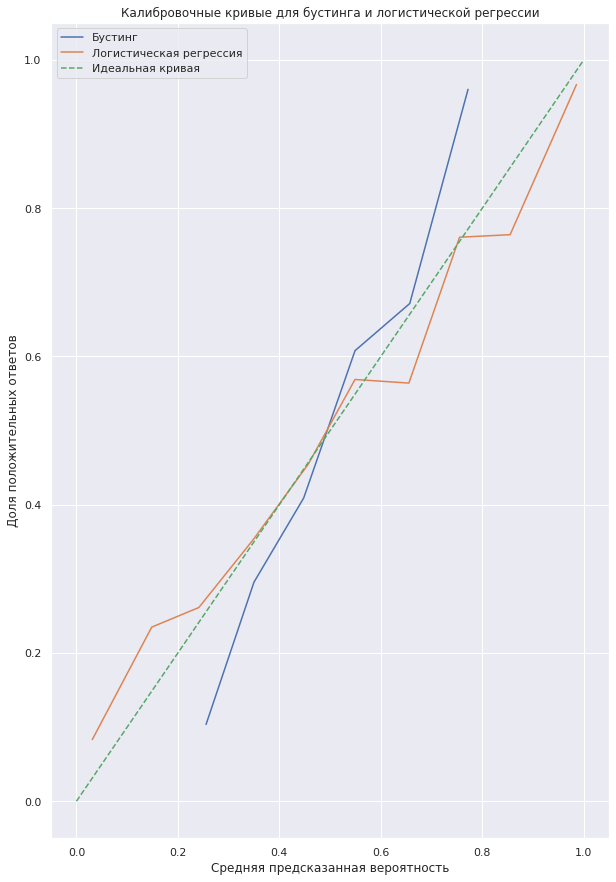

In [ ]:
plt.figure(figsize=(10, 15))

# обучаем логистическую регрессию
lr = LogisticRegression()
lr.fit(x_train, y_train)

# делаем предсказания
lr_pred = lr.predict_proba(x_test)[:, 1]
boost_pred = my_best_model.predict_proba(x_test)[:, 1]

# калибруем
x_lr, y_lr = calibration_curve(y_test, lr_pred, n_bins=10)
x_boost, y_boost = calibration_curve(y_test, boost_pred, n_bins=10)

# строим калибровочные кривые
plt.plot(y_boost, x_boost, label='Бустинг')
plt.plot(y_lr, x_lr, label='Логистическая регрессия')
plt.plot([0, 1], [0, 1], label='Идеальная кривая', linestyle='--')

plt.title('Калибровочные кривые для бустинга и логистической регрессии')
plt.xlabel('Средняя предсказанная вероятность')
plt.ylabel('Доля положительных ответов')

plt.legend()
plt.show()

Бустинг довольно хорошо оценивает вероятности. Похуже логистической регрессии, про которую мы знаем, что она действительно выдает вероятности, но в целом неплохо (хотя и после где-то 0.7 что-то начинает идти не совсем так). 

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

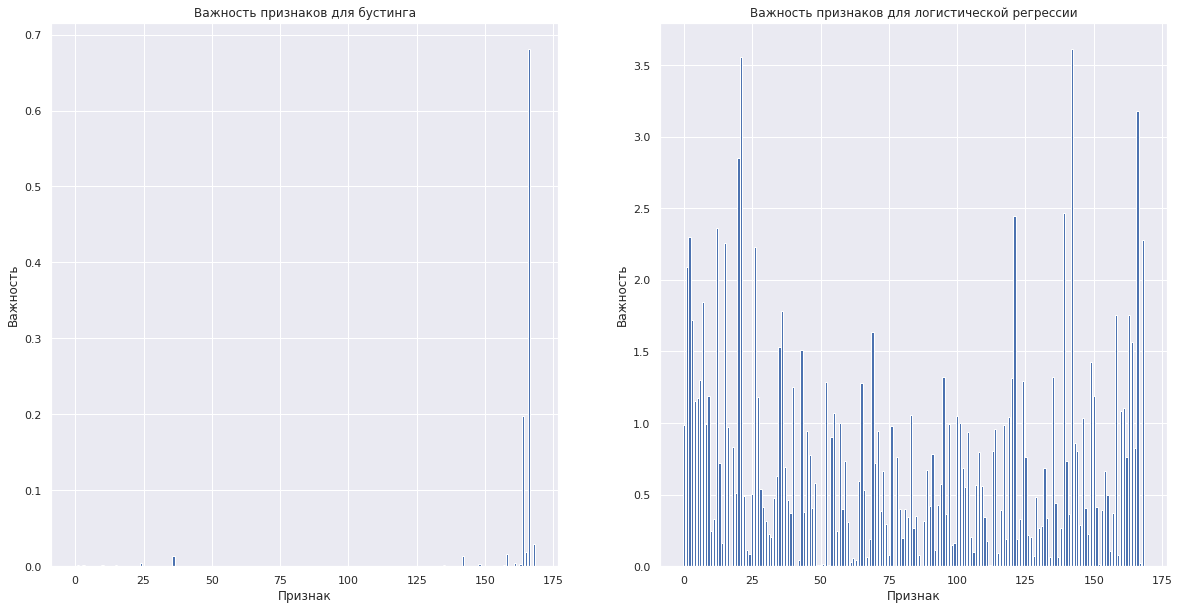

In [ ]:
plt.figure(figsize=(20, 10))

# бустинг
plt.subplot(1, 2, 1)
plt.bar(range(len(my_best_model.feature_importances_)), my_best_model.feature_importances_)

plt.title('Важность признаков для бустинга')
plt.xlabel('Признак')
plt.ylabel('Важность')

# логистическая регрессия
plt.subplot(1, 2, 2)
plt.bar(range(len(lr.coef_[0])), np.abs(lr.coef_[0]))

plt.title('Важность признаков для логистической регрессии')
plt.xlabel('Признак')
plt.ylabel('Важность')

plt.show()

Градиентный бустинг зануляет много признаков (или делает их вестаким маленьким, что вклад его не заметен), т.е. бустинг отбирает признаки. В логистической регрессии признаки не зануляются. Есть несколько признаков с особенно высоким весом, но их значительно больше, чем для бустинга. С помощью логистической регрессии нельзя выделить признаки, с которыми мы будем работать, а остальнеые выкинуть.

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [ ]:
# кажется, что где-то до 40 есть немного важные признаки и после 125. возьмем эти признаки

filter = list(range(40)) + list(range(125, x_train.shape[1]))
train_filtered = x_train[:, filter]
valid_filtered = x_valid[:, filter]
test_filtered = x_test[:, filter]

my_best_model_filtered = Boosting(base_model_params = best_base, **best_boosting)
my_best_model_filtered.fit(train_filtered, y_train, valid_filtered, y_valid)

print('Моя модель на важных признаках на обучении:', my_best_model_filtered.score(train_filtered, y_train))
print('Моя модель на важных признаках на тесте:', my_best_model_filtered.score(test_filtered, y_test))

print('Моя модель на всем трейне:', my_best_model_score_train, '\nМоя модель на всем тесте:', my_best_model_score_test)

Моя модель на важных признаках на обучении: 0.9581702818145261
Моя модель на важных признаках на тесте: 0.9314152534233527
Моя модель на всем трейне: 0.9583431461452137 
Моя модель на всем тесте: 0.9310751618190493


Стало хуже в четвертом знаке после запятой, т.е. в целом ничего не изменилось.

## Задание 7 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашими лучшими моделями (ваша реализация с лучшими гиперпараметрами + все модели из библиотек с лучшими гиперпараметрами). Улучшилось ли качество?

In [ ]:
from lightgbm import LGBMClassifier
from xgboost import XGBoostRegressor

ImportError: ignored

In [ ]:
# сделаем еще с xgboost, lgbm
from lightgbm import LGBMClassifier


params = {'n_estimators': [100, 400, 800, 1000],
         'max_depth': list(range(2, 10, 2)), 
         'learning_rate': [0.1, 0.05, 0.15],
         'loss_function': ['RMSE', 'Logloss', 'MAE', 'CrossEntropy']}
        
gs = GridSearchCV(XGBoostRegressor(), param_grid=params, cv=3, scoring=score_cat) 
gs.fit(x_valid, y_valid)
best_catboost = gs.best_params_
print(best_catboost)

params = {'n_estimators': list(range(2, 20, 2)),
         'max_depth': list(range(2, 10, 2)), 
         'learning_rate': [0.05, 0.1, 0.15, 0.3]}

gs = GridSearchCV(LGBMClassifier(), param_grid=params, cv=3, scoring=score_cat)
gs.fit(x_valid, y_valid)
best_lgbm = gs.best_params_

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2022 года?

Какой год, такая и елка! Главное, что я улыбаюсь... Хочу быть самой счастливой в новом году и больше не расстраиваться по пустякам! Спасибо, что проверяли все мои домашки! С Наступающим и счастья в новом году!!!

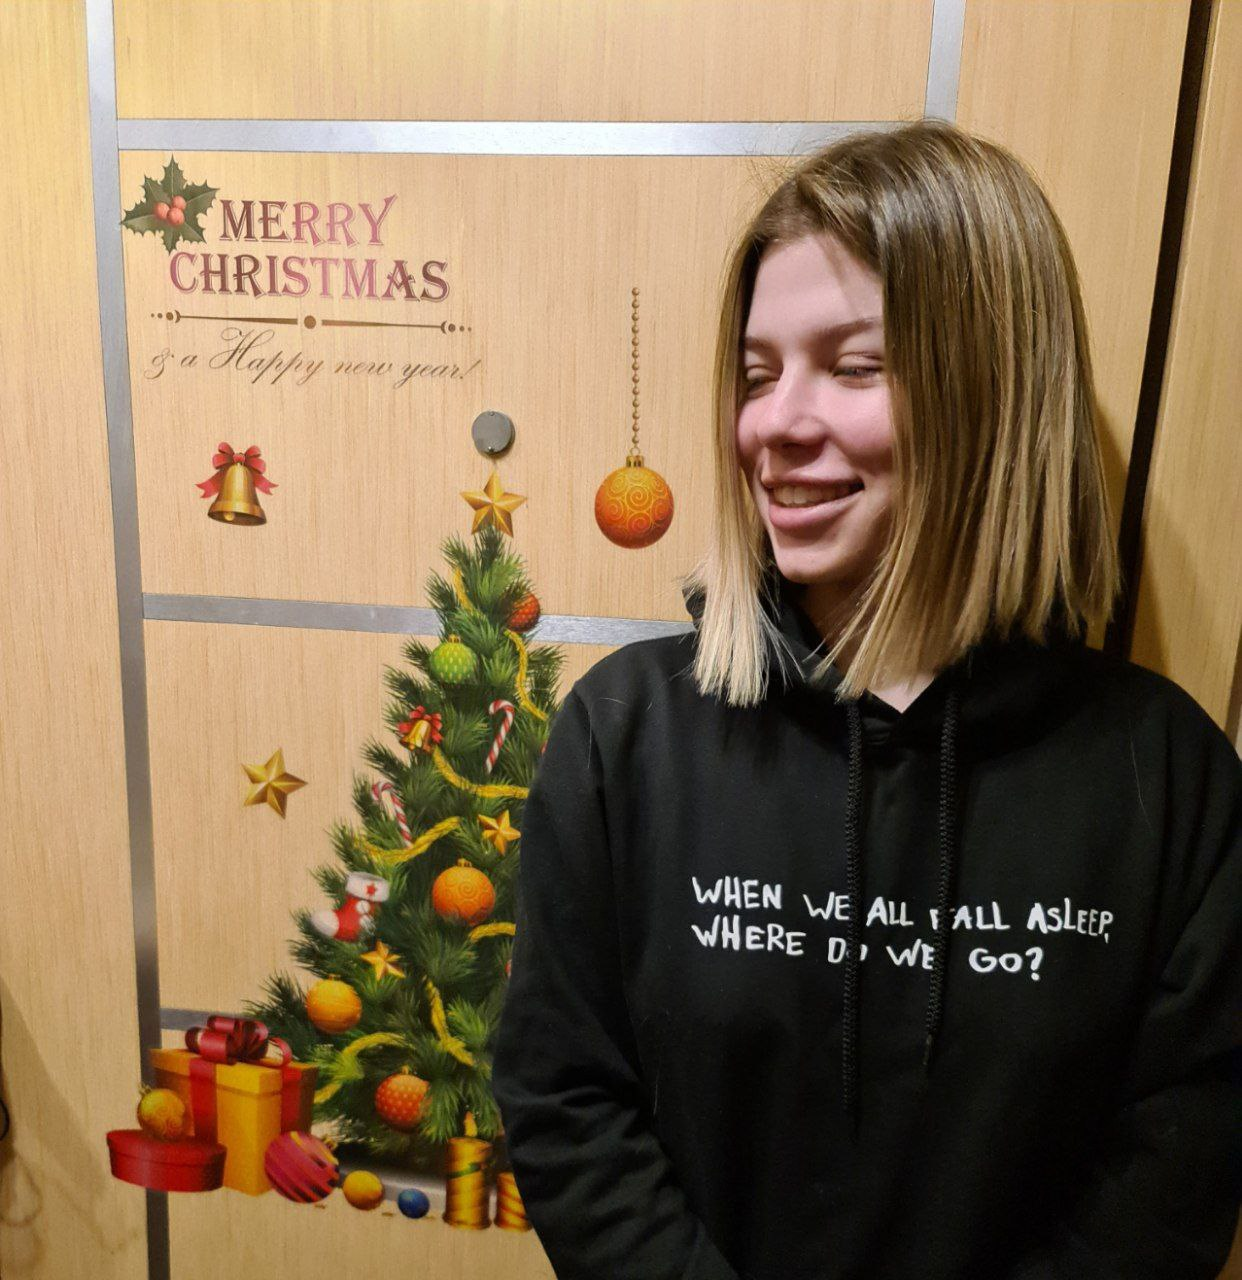